In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Peeking to data

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


  
**age:** age in years  
**sex:** (1 = male; 0 = female)  
**cp:** chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)  
**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)  
**chol:** serum cholestoral in mg/dl  
**fbs:** (fasting blood sugar > 120 mg/dl) (1: true; 0: false)  
**restecg:** resting electrocardiographic results (0: normal, 1: having abnormality, 2 = showing ventricular hypertrophy)   
**thalach:** maximum heart rate achieved  
**exang:** exercise induced angina (1: yes, 0: no)    
**oldpeak:** ST depression induced by exercise relative to rest   
**slope:** the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)  
**ca:** number of major vessels (0-3) colored by flourosopy    
**thal:** thalassemia(a blood disorder) (3 = normal; 6 = fixed defect; 7 = reversable defect)  
**target:** heart disease (0: no, 1: yes)  
  

In [3]:
# changing column names to more informative ones
df.columns = ['age', 'isMale', 'cp', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'maximum_heart_rate', 'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 
              'thal', 'heart_disease']
df

,age,isMale,cp,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,slope,major_vessels,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# checking for null values before processing
df.isnull().values.any()

False

  
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.
  

In [5]:
df.describe()

,age,isMale,cp,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,slope,major_vessels,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dummy Variables

In [6]:
# turning categorical data into dummy variables.

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.columns

Index(['age', 'isMale', 'cp', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'maximum_heart_rate',
       'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 'thal',
       'heart_disease', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [7]:
# dropping categorized columns / thal_0 miscreated by get_dummies
df = df.drop(columns = ['cp', 'thal', 'thal_0', 'slope'])

# renaming categorical columns
df = df.rename(columns={'cp_0':'typical_angina_pain','cp_1':'atypical_angina_pain','cp_2':'non-anginal_pain','cp_3':'asymptomatic_pain',
                       'slope_0':'upsloping_st', 'slope_1':'flat_st', 'slope_2':'downsloping_st',
                       'thal_1': 'thalassemia_normal', 'thal_2': 'thalassemia_fixed', 'thal_3': 'thalassemia_reversable'})
df

,age,isMale,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,major_vessels,...,typical_angina_pain,atypical_angina_pain,non-anginal_pain,asymptomatic_pain,thalassemia_normal,thalassemia_fixed,thalassemia_reversable,upsloping_st,flat_st,downsloping_st
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,1,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,0,1,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,1,0,0,0,0,0,1,0,1,0


### Correlation Heatmap

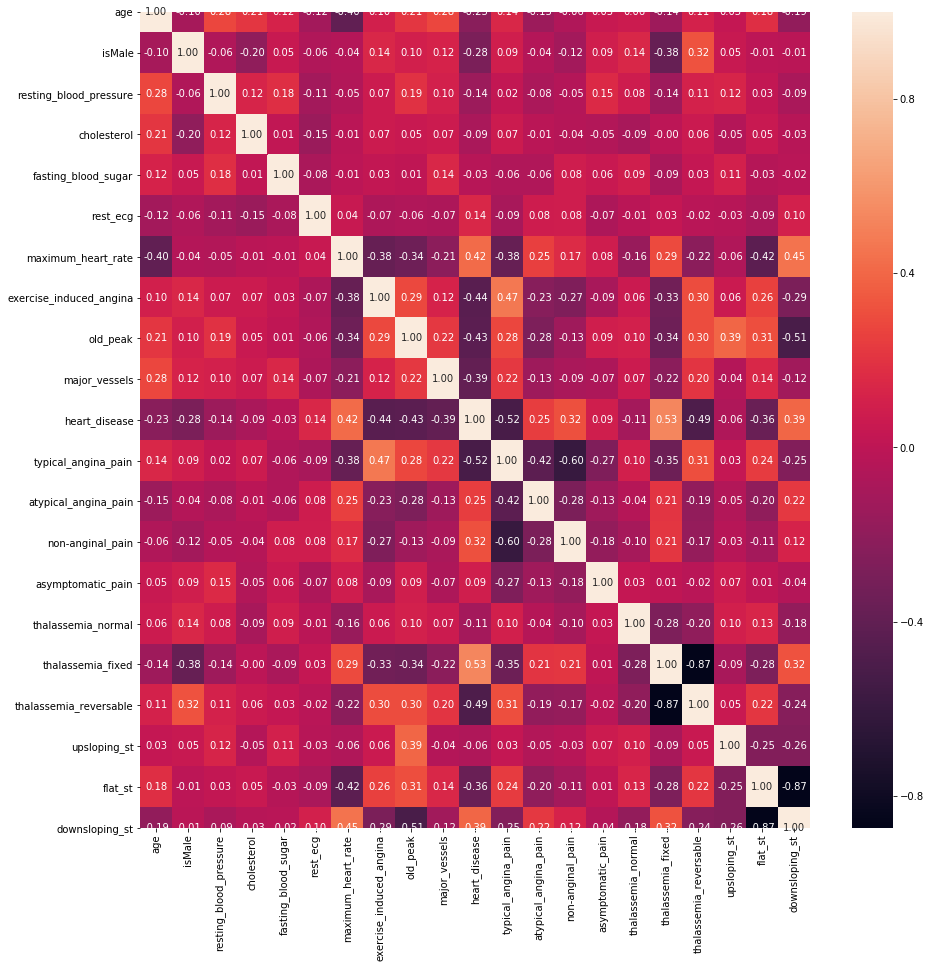

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

### Relationship Visualization

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

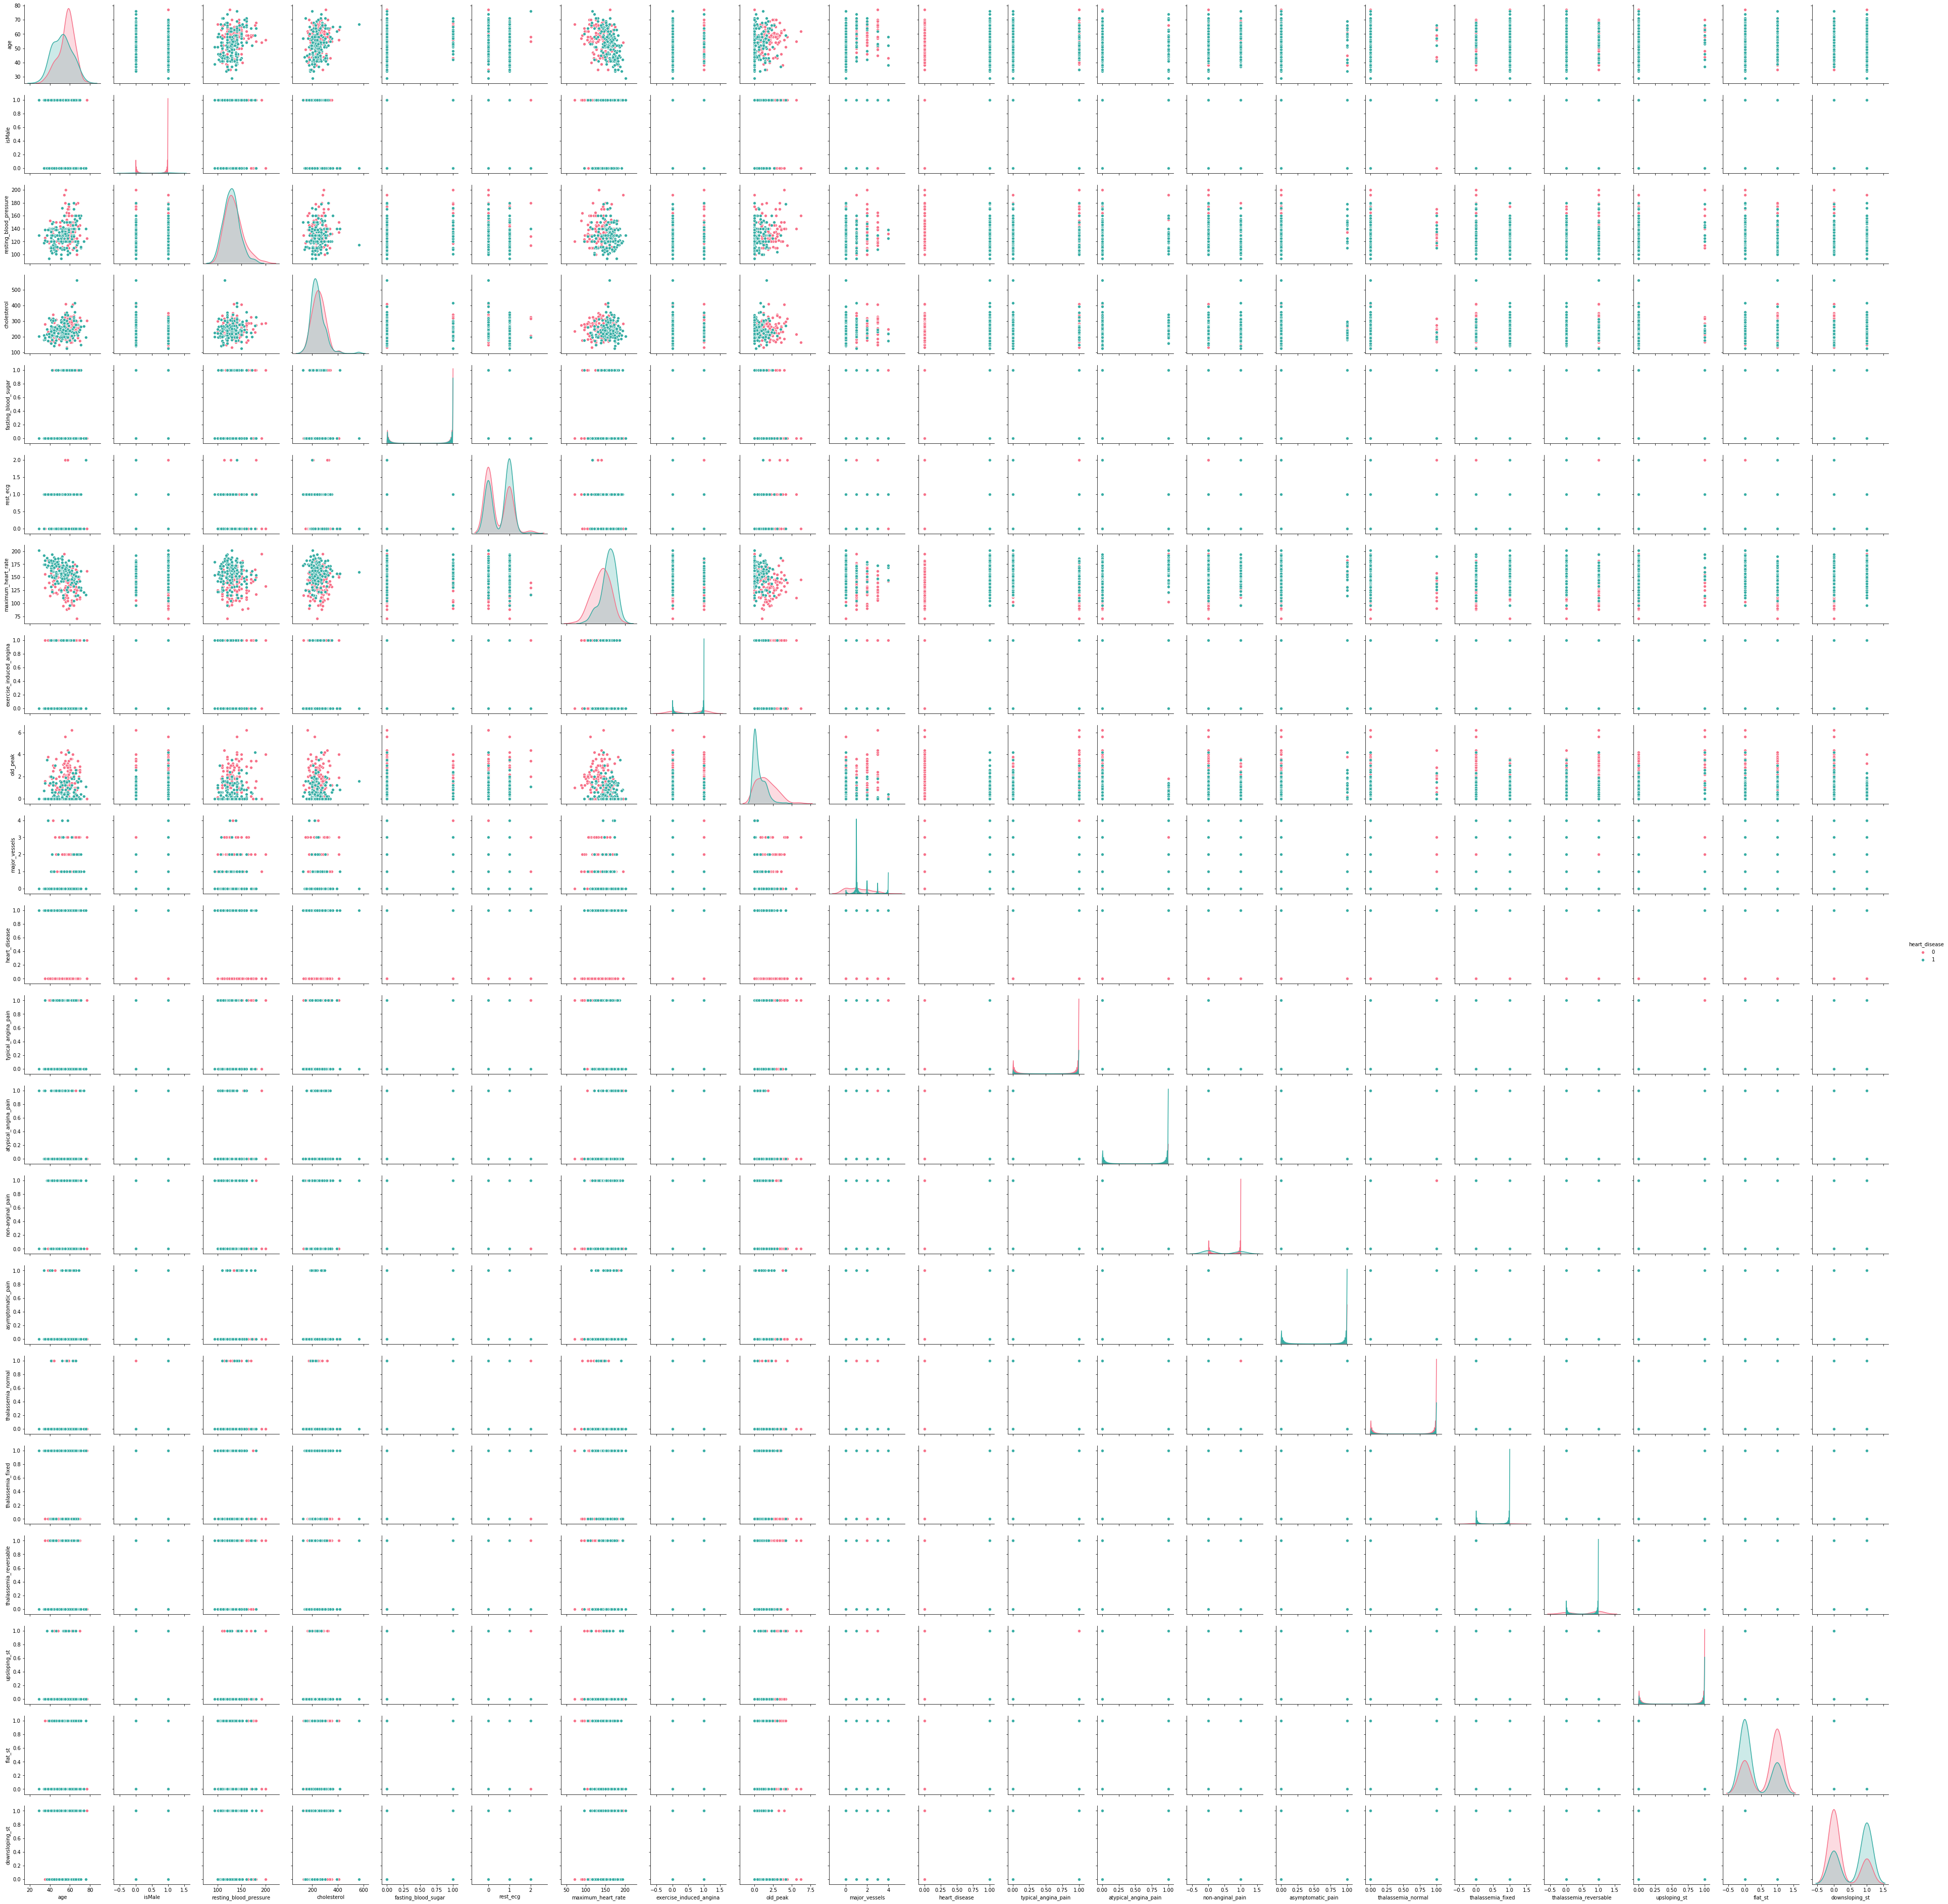

In [66]:
# ignoring divide error and pair plotting
with np.errstate(divide='ignore',invalid='ignore'):
    sns.pairplot(df, hue="heart_disease", palette="husl")
plt.show()

### Age and Gender Analysis

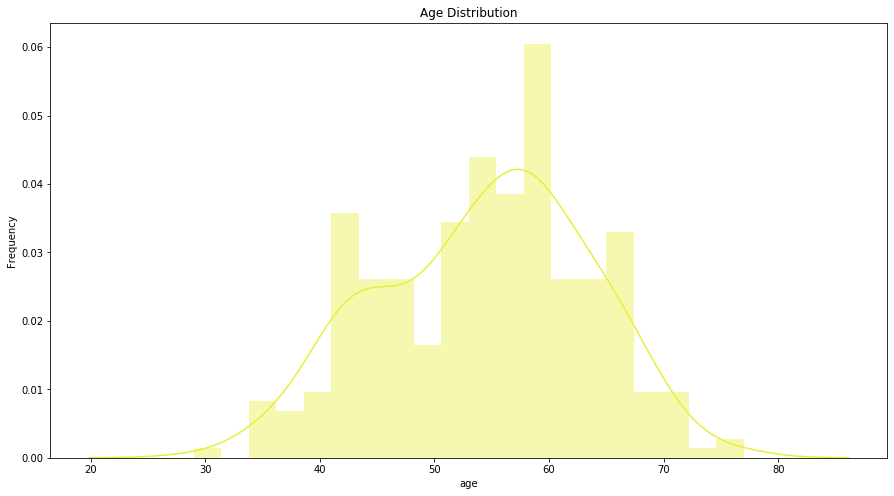

In [10]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution')
plt.ylabel('Frequency')
sns.distplot(df['age'],color='#E9EE3B',bins=20)

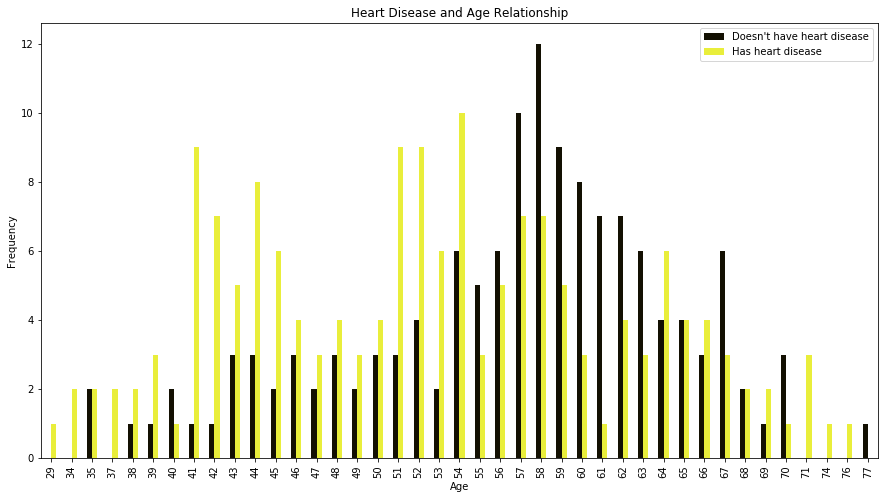

In [11]:
pd.crosstab(df.age,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B' ])
plt.title('Heart Disease and Age Relationship')
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

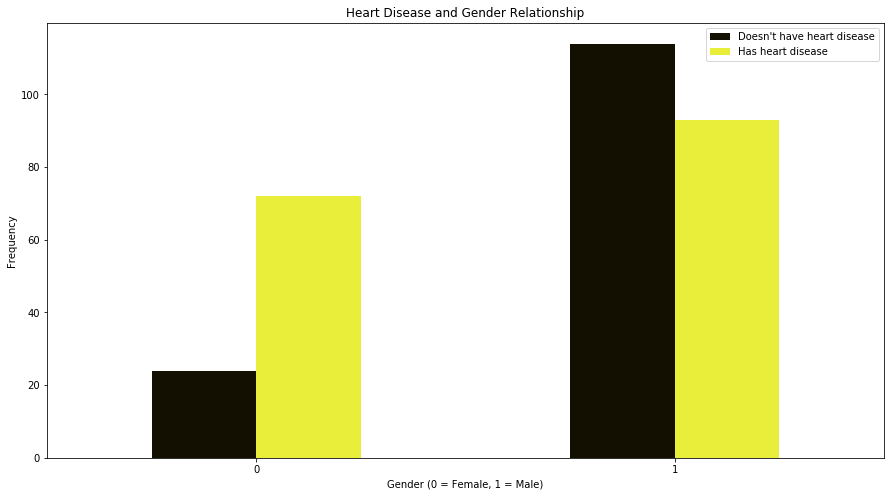

In [12]:
pd.crosstab(df.isMale,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B'])
plt.title('Heart Disease and Gender Relationship')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.ylabel('Frequency')
plt.show()

### Normalize Data

In [13]:
x_data = df.drop(['heart_disease'], axis=1)

# normalization
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
y = df['heart_disease']

# Model Selection

**NOTE:** Since this is a medical problem, we need to avoid false negatives as much as possible(they are deadly!). So **recall** is really important for this situation.

### Support Vector Machines

The objective of the support vector machine algorithm is to find a hyperplane in space that distinctly classifies the data points.

![Support Vector Machines](images/svm.png)

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

svc=SVC(kernel= 'rbf', gamma = 'scale' ,random_state=42)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)

# storing recall_score for later comparision
svm_recall = round(recall_score(y_test,svm_pred,average='weighted'),3)

print (classification_report(y_test, svm_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
acc = accuracy_score(y_test, svm_pred)
print ("Accuracy: %.3f" % acc)

              precision    recall  f1-score   support

           0      0.885     0.852     0.868        27
           1      0.886     0.912     0.899        34

    accuracy                          0.885        61
   macro avg      0.885     0.882     0.883        61
weighted avg      0.885     0.885     0.885        61

Accuracy: 0.885


#### Confusion Matrix

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known.

![Confusion Matrix](images/confusion_matrix.png)

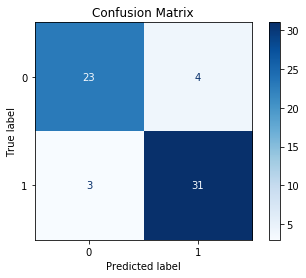

In [16]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(svc, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

We can calculate **recall** manually looking at the table. For recall: TP / (TP + FN) -> 23 / (23 + 3) = **0.885**  
We already calculated recall using sklearn's recal_score() method. 

#### <span style="color:blue">Recall score with SVM is: 0.885 </span>

### ROC Curve

ROC is a probability curve and AUC(area under the curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
![ROC Curve](images/roccurve.png)


**TPR:**
![TPR](images/tpr.png)

**Specificity:**
![Specificity](images/specificity.png)


**FPR:**
![FPR](images/fpr.png)

gamma = 0.01  accuracy = 0.87   AUC = 0.92
gamma = 0.1  accuracy = 0.87   AUC = 0.93
gamma = 0.2  accuracy = 0.87   AUC = 0.94
gamma = 1  accuracy = 0.84   AUC = 0.92
gamma = scale  accuracy = 0.89   AUC = 0.94
gamma = auto  accuracy = 0.87   AUC = 0.92


C:\Users\soner\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


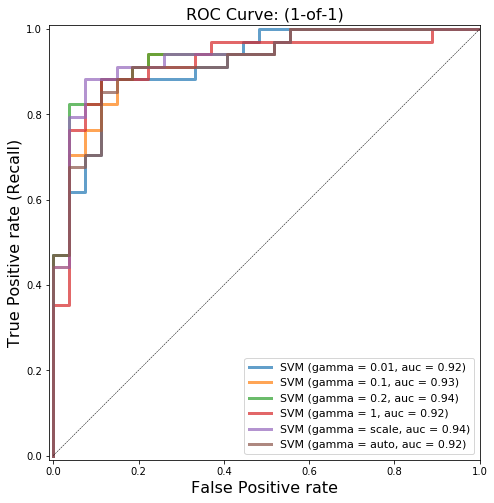

In [17]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (15,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1, 'scale', 'auto']:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {}, auc = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Cross Validation

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [18]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X_train, y_train,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [19]:
print(train_scores)

[[0.54037267 0.54037267 0.54320988]
 [0.85714286 0.81987578 0.88271605]
 [0.99378882 1.         0.99382716]
 [1.         1.         1.        ]]


In [20]:
print(test_scores)

[[0.54320988 0.54320988 0.5375    ]
 [0.77777778 0.85185185 0.825     ]
 [0.60493827 0.65432099 0.6375    ]
 [0.54320988 0.54320988 0.5375    ]]


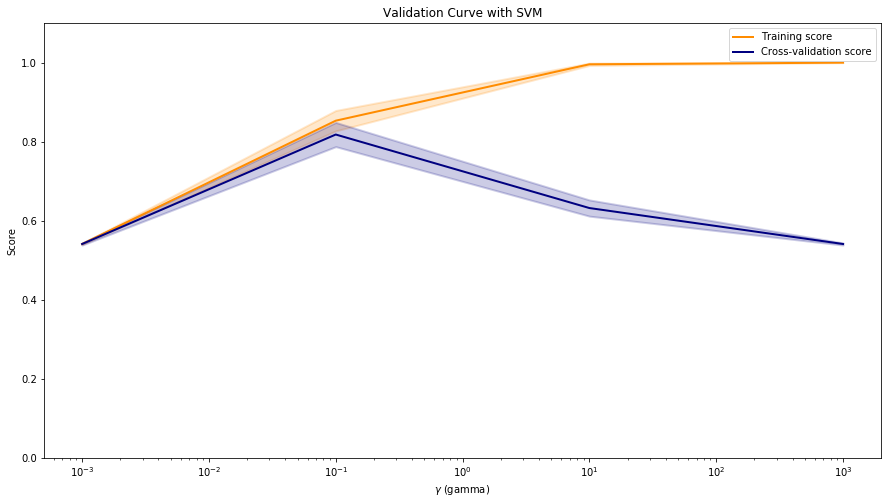

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.

### K-Nearest Neighbors

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity by calculating the distance between points on a graph.  
![KNN](images/knn.png)


              precision    recall  f1-score   support

           0      0.857     0.889     0.873        27
           1      0.909     0.882     0.896        34

    accuracy                          0.885        61
   macro avg      0.883     0.886     0.884        61
weighted avg      0.886     0.885     0.885        61

Accuracy: 0.885


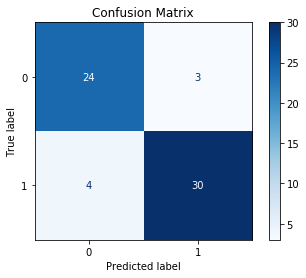

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8,metric='minkowski')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# storing recall_score for later comparision
knn_recall = round(recall_score(y_test,knn_pred,average='weighted'),3)

print (classification_report(y_test, knn_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, knn_pred))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

#### <span style="color:blue">Recall score with KNN is: **0.885** </span>

### Decision Trees

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

![Decision Trees](images/decision_tree.png)

In [57]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# predict the target on the test dataset
tree_predict_test = tree.predict(X_test)

tree_recall = round(recall_score(y_test, tree_predict_test, average='weighted'),3)

#### Feature Importances

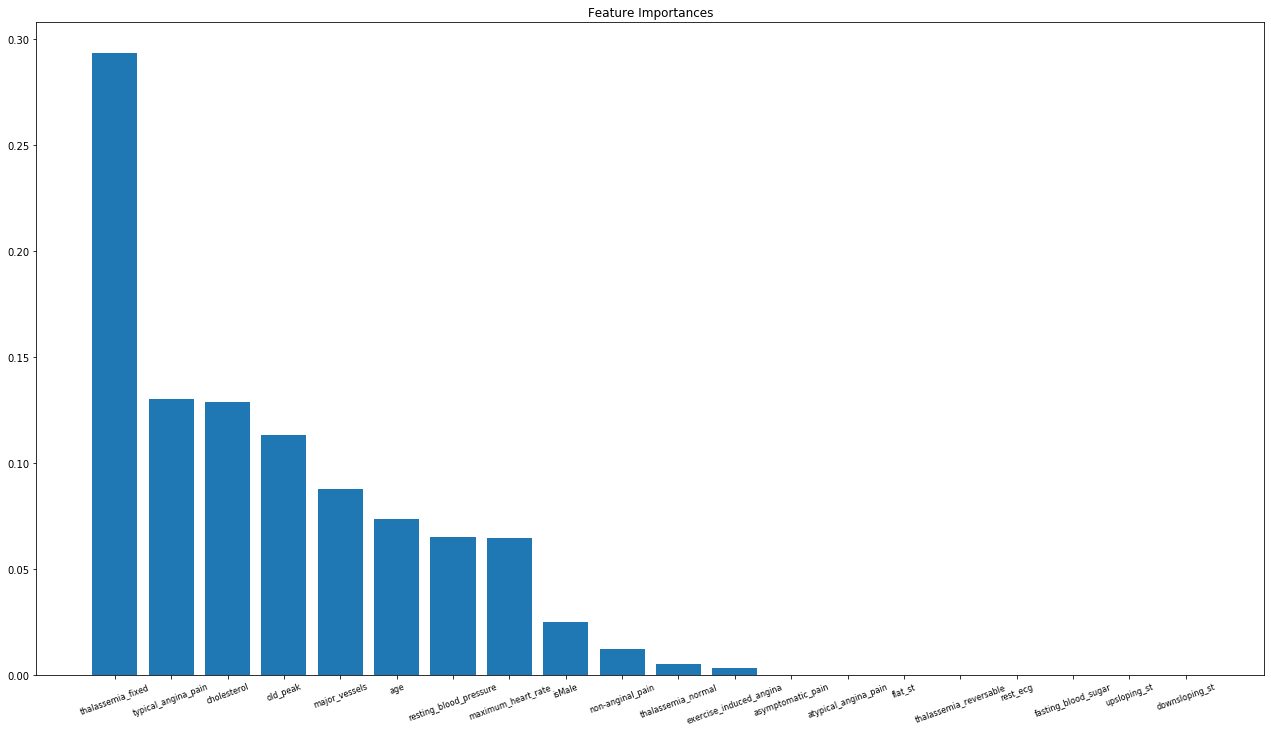

In [58]:
# Calculate feature importances
importances = tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (22,12))
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importances")
# Show plot
plt.show()

**NOTE:** According to the bar plot above, having thalessemia fixed defect is determiner factor whether a person has a heart disease or not. This research also support this finding:  

*'All patients with fixed defects had significant coronary artery disease.'*
https://www.ncbi.nlm.nih.gov/pubmed/18693590

              precision    recall  f1-score   support

           0      0.733     0.815     0.772        27
           1      0.839     0.765     0.800        34

    accuracy                          0.787        61
   macro avg      0.786     0.790     0.786        61
weighted avg      0.792     0.787     0.788        61



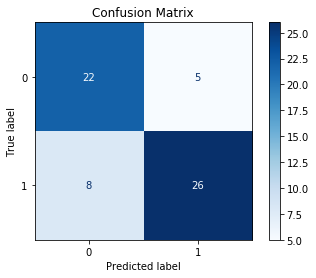

In [59]:
print (classification_report(y_test, tree_predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# confusion matrix
disp = plot_confusion_matrix(tree, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

### Extreme Gradient Boosted Decision Trees(XGBoost)

XGBoost is an implementation of Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. Weight of variables predicted wrong by the tree is increased and these the variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

![XGBoost](images/xgboost.png)


accuracy_score on train dataset :  0.9834710743801653
              precision    recall  f1-score   support

           0      0.846     0.815     0.830        27
           1      0.857     0.882     0.870        34

    accuracy                          0.852        61
   macro avg      0.852     0.849     0.850        61
weighted avg      0.852     0.852     0.852        61



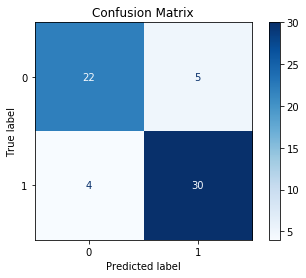

In [60]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

model = XGBClassifier()
 
# fit the model with the training data
model.fit(X_train,y_train)
 
# Accuray Score on train dataset
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)

xgb_recall = round(recall_score(y_test, predict_test, average='weighted'),3)

print (classification_report(y_test, predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)

# confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

#### <span style="color:blue">Recall score with XGBoost is: **0.852** </span>

### Comparision of Models

In [61]:
recall_dict = {'SVM':svm_recall,
               'KNN': knn_recall,
               'Decision Trees': tree_recall,
               'XGBoost': xgb_recall
               }
pr_df = pd.DataFrame(recall_dict,index=['Recall Score'])
pr_df

,SVM,KNN,Decision Trees,XGBoost
Recall Score,0.885,0.885,0.787,0.852


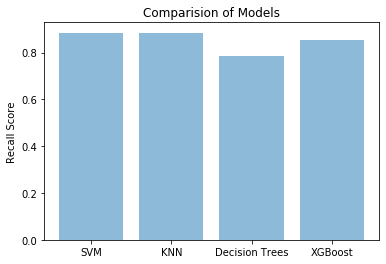

In [62]:
y_pos = np.arange(len(recall_dict))
plt.bar(y_pos, recall_dict.values(), align='center', alpha=0.5)
plt.xticks(y_pos, recall_dict.keys())
plt.ylabel('Recall Score')
plt.title('Comparision of Models')

plt.show()